In [147]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from pathlib import Path

In [148]:
sleep_filepath = Path.home() / "data/sleep.csv"

In [149]:
raw_sleep_data = pd.read_csv(sleep_filepath)

In [150]:
raw_sleep_data.head(1).T

0
Date (US)                          04/25/2016 06:21:47
Date (non-US)                      25/04/2016 06:21:47
Time in Milliseconds                     1461565307370
Time in Seconds                             1461565307
Year                                              2016
Month                                                4
Day                                                 25
Comment                                            NaN
Tags                                               NaN
Source Data                           Google Fit Sleep
SyncItemLink                                       NaN
Bed Time Hour                                        6
Bed Time Minute                                     21
Bed Time Second                                     47
Bed Time Millisecond                               370
Bed Time in HH:MM format                         06:21
Bed Time in HH:MM:SS.sss format               23:21:47
Awake Hour                                          11
Awake Minute                                        41
Awake Second                                         7
Awake Millisecond                                  427
Awake Time in HH:MM format                       11:41
Awake Time in HH:MM:SS.sss format             04:41:07
Minutes Sleeping                                   319
Hours of Sleep                                       5
Minutes Settling                                     0
Number of Times Awakened                             0
Minutes in L0 Sleep (Light)                          0
Minutes in L1 Sleep                                  0
Minutes in L2 Sleep                                  0
Minutes in L3 Sleep (Deep)                         319
Minutes in REM Sleep                                 0
Minutes Awake                                        0
Sleeping Heart Rate                                  0
Sleeping Respitory Rate                              0
Sleeping HRV RMMSD in Morning                        0
Sleeping HRV RMMSD in Evening                        0

In [188]:
selected_columns = {"Date (US)": "timestamp",
                    "Minutes Sleeping": "sleep_duration",
                    "Bed Time Hour": "bed_time_hour",
                    "Bed Time Minute": "bed_time_minute",
                    "Awake Hour": "awake_hour",
                    "Awake Minute": "awake_minute",
                    "Minutes Sleeping": "sleeping_minutes"}

In [189]:
sleep_data = (raw_sleep_data.loc[:, selected_columns]
                            .rename(columns=selected_columns)
                            .assign(timestamp=lambda x: pd.to_datetime(x["timestamp"]))
                            .assign(bed_time_minutes=lambda x: x["bed_time_hour"] * 60 + x["bed_time_minute"])
                            .assign(awake_minutes=lambda x: x["awake_hour"] * 60 + x["awake_minute"])
                            .set_index("timestamp"))

In [190]:
sleep_data.head(1).T

timestamp         2016-04-25 06:21:47
sleeping_minutes                  319
bed_time_hour                       6
bed_time_minute                    21
awake_hour                         11
awake_minute                       41
bed_time_minutes                  381
awake_minutes                     701

In [191]:
sleep_data[::-1]

sleeping_minutes  bed_time_hour  bed_time_minute  \
timestamp                                                               
2019-06-11 02:34:00               582              2               34   
2019-06-10 06:28:00               400              6               28   
2019-06-09 04:32:00               556              4               32   
2019-06-08 04:37:00               472              4               37   
2019-06-07 03:13:00               679              3               13   
2019-06-06 05:32:00               433              5               32   
2019-06-05 03:07:00               519              3                7   
2019-06-04 03:28:00               482              3               28   
2019-06-03 04:29:00               437              4               29   
2019-06-02 04:19:00               532              4               19   
2019-06-01 03:57:00               535              3               57   
2019-05-30 02:28:00               496              2               28   
2019-05-29 05:02:00               488              5                2   
2019-05-28 03:06:00               373              3                6   
2019-05-27 02:54:00               507              2               54   
2019-05-26 00:42:00               481              0               42   
2019-05-25 04:42:00               299              4               42   
2019-05-24 02:50:00               541              2               50   
2019-05-23 03:56:00               447              3               56   
2019-05-22 04:11:00               375              4               11   
2019-05-21 03:19:00               529              3               19   
2019-05-19 04:12:00               449              4               12   
2019-05-18 03:14:00               509              3               14   
2019-05-16 01:02:00               572              1                2   
2019-05-12 01:08:00               573              1                8   
2019-05-11 00:46:00               465              0               46   
2019-05-10 03:31:00               519              3               31   
2019-05-08 03:54:00               455              3               54   
2019-05-07 02:16:00               430              2               16   
2019-05-06 02:56:00               431              2               56   
...                               ...            ...              ...   
2016-11-21 06:20:50               595              6               20   
2016-11-20 07:00:14               390              7                0   
2016-11-07 06:41:23               490              6               41   
2016-10-20 02:47:49               508              2               47   
2016-10-19 06:22:35               463              6               22   
2016-10-18 03:37:45               468              3               37   
2016-10-17 06:43:04               456              6               43   
2016-10-16 04:54:20               564              4               54   
2016-10-15 15:30:32                44             15               30   
2016-10-15 02:06:00               525              2                6   
2016-10-14 19:30:08                65             19               30   
2016-10-14 06:32:37               355              6               32   
2016-10-13 04:59:02               650              4               59   
2016-10-12 07:16:10               439              7               16   
2016-10-11 04:20:42               431              4               20   
2016-10-10 07:14:51               416              7               14   
2016-05-06 05:02:46               565              5                2   
2016-05-05 06:00:47               519              6                0   
2016-05-04 04:19:23               620              4               19   
2016-05-03 04:49:30               571              4               49   
2016-05-02 05:49:28               609              5               49   
2016-05-02 00:40:05               104              0               40   
2016-0

In [192]:
MAX_MINUTES = 24 * 60

resampled_data = sleep_data.resample("4w")
mean_resampled_data = resampled_data.apply(lambda x: st.circmean(x, low=0, high=MAX_MINUTES) / 60)
std_resampled_data = resampled_data.apply(lambda x: st.circstd(x, low=0, high=MAX_MINUTES) / 60)

In [193]:
mean_resampled_data["bed_time_minutes"][::-1].head(10)

timestamp
2019-06-23    3.975793
2019-05-26    3.094443
2019-04-28    4.017056
2019-03-31    3.859015
2019-03-03    4.322810
2019-02-03    3.732763
2019-01-06         NaN
2018-12-09    2.983333
2018-11-11    4.167684
2018-10-14    4.512936
Freq: -4W-SUN, Name: bed_time_minutes, dtype: float64

In [194]:
std_resampled_data["bed_time_minutes"][::-1].head(10)

timestamp
2019-06-23    1.115673
2019-05-26    1.350562
2019-04-28    0.928989
2019-03-31    1.385821
2019-03-03    1.287962
2019-02-03    0.791377
2019-01-06         NaN
2018-12-09    1.398916
2018-11-11    2.093258
2018-10-14    1.272407
Freq: -4W-SUN, Name: bed_time_minutes, dtype: float64

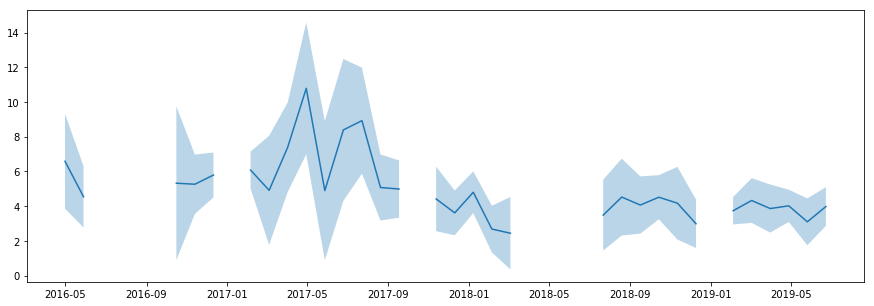

In [195]:
x = mean_resampled_data.index

y = mean_resampled_data["bed_time_minutes"]
std = std_resampled_data["bed_time_minutes"]
y_lower = y - std
y_upper = y + std

plt.figure(figsize=(15, 5))

plt.plot(x, y)
plt.fill_between(x, y_lower, y_upper, alpha=0.3)

plt.show()

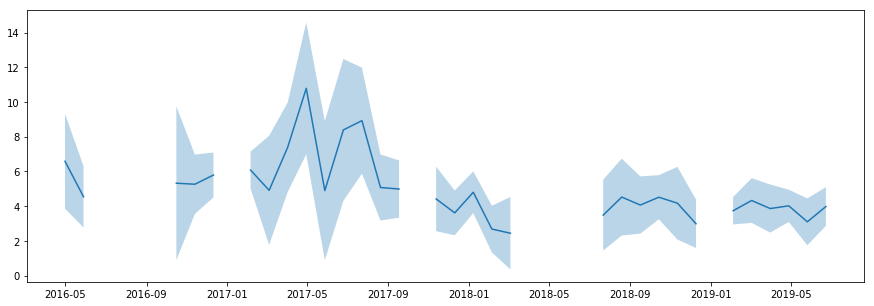

In [196]:
x = mean_resampled_data.index

y = mean_resampled_data["bed_time_minutes"]
std = std_resampled_data["bed_time_minutes"]
y_lower = y - std
y_upper = y + std

plt.figure(figsize=(15, 5))

plt.plot(x, y)
plt.fill_between(x, y_lower, y_upper, alpha=0.3)

plt.show()

In [197]:
mean_resampled_data["awake_minutes"][::-1].head(1)

timestamp
2019-06-23    12.385094
Freq: -4W-SUN, Name: awake_minutes, dtype: float64

In [198]:
std_resampled_data["awake_minutes"][::-1].head(1)

timestamp
2019-06-23    1.091173
Freq: -4W-SUN, Name: awake_minutes, dtype: float64

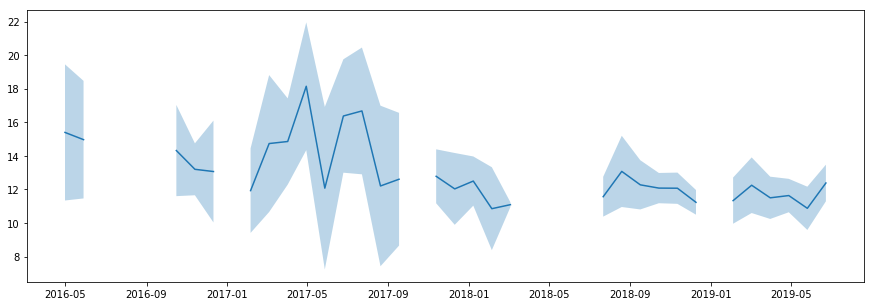

In [199]:
x = mean_resampled_data.index

y = mean_resampled_data["awake_minutes"]
std = std_resampled_data["awake_minutes"]
y_lower = y - std
y_upper = y + std

plt.figure(figsize=(15, 5))

plt.plot(x, y)
plt.fill_between(x, y_lower, y_upper, alpha=0.3)

plt.show()

In [201]:
resampled_data.std()["sleeping_minutes"]

timestamp
2016-05-01    177.861905
2016-05-29    196.316072
2016-06-26           NaN
2016-07-24           NaN
2016-08-21           NaN
2016-09-18           NaN
2016-10-16    208.379462
2016-11-13     21.494185
2016-12-11    146.997732
2017-01-08           NaN
2017-02-05    130.791182
2017-03-05    208.276475
2017-04-02    272.952010
2017-04-30    132.958538
2017-05-28    193.668712
2017-06-25    181.367908
2017-07-23    159.251227
2017-08-20    226.845101
2017-09-17    180.827819
2017-10-15           NaN
2017-11-12     57.917275
2017-12-10    156.125179
2018-01-07     76.589935
2018-02-04    229.631686
2018-03-04    265.511456
2018-04-01           NaN
2018-04-29     63.711808
2018-05-27           NaN
2018-06-24           NaN
2018-07-22    499.818567
2018-08-19    747.384448
2018-09-16    481.343857
2018-10-14    417.114220
2018-11-11    134.375628
2018-12-09    179.605122
2019-01-06           NaN
2019-02-03     78.711922
2019-03-03     66.987636
2019-03-31     62.176671
2019-04-28     